# Project 1: Analysis of Various Metrics and How They Relate to Stress and Work-Life Balance

In [1]:
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt

## Data Cleaning and Exploration

In [2]:
# Read csv file
wellbeing_df = pd.read_csv('data/Wellbeing_and_lifestyle_data_Kaggle.csv')
wellbeing_df.head()

,Timestamp,FRUITS_VEGGIES,DAILY_STRESS,PLACES_VISITED,CORE_CIRCLE,SUPPORTING_OTHERS,SOCIAL_NETWORK,ACHIEVEMENT,DONATION,BMI_RANGE,...,SLEEP_HOURS,LOST_VACATION,DAILY_SHOUTING,SUFFICIENT_INCOME,PERSONAL_AWARDS,TIME_FOR_PASSION,WEEKLY_MEDITATION,AGE,GENDER,WORK_LIFE_BALANCE_SCORE
0,7/7/15,3,2,2,5,0,5,2,0,1,...,7,5,5,1,4,0,5,36 to 50,Female,609.5
1,7/7/15,2,3,4,3,8,10,5,2,2,...,8,2,2,2,3,2,6,36 to 50,Female,655.6
2,7/7/15,2,3,3,4,4,10,3,2,2,...,8,10,2,2,4,8,3,36 to 50,Female,631.6
3,7/7/15,3,3,10,3,10,7,2,5,2,...,5,7,5,1,5,2,0,51 or more,Female,622.7
4,7/7/15,5,1,3,3,10,4,2,4,2,...,7,0,0,2,8,1,5,51 or more,Female,663.9


In [3]:
# Change the datatype of the stress column to an integer

# First find the row(s) that is NOT a number on the stress scale
stress_scores = wellbeing_df['DAILY_STRESS'].unique()

# Convert the stress scores into a list
stress_scores_list = list(stress_scores)
print(stress_scores_list)

# From the list, drop the values that are not valid stress scores
invalid_response = '1/1/00'

# Create a variable to filter for the invalid response
drop_response = (wellbeing_df['DAILY_STRESS'] == invalid_response)

# Drop the row containing the invalid response
wellbeing_df = wellbeing_df.loc[~drop_response]
wellbeing_df

# Convert the daily stress column to an integer and check it was converted correctly
wellbeing_df['DAILY_STRESS'] = wellbeing_df['DAILY_STRESS'].astype(int)
wellbeing_df.info()

# Rename the age values for clarity purposes
wellbeing_df = wellbeing_df.replace("Less than 20", "20 or Younger")
wellbeing_df = wellbeing_df.replace("51 or more", "51 or Older")

# Create bins to categorize work life balance scores 
bins =[0, 550, 680, 900]
group_names = ['Poor', 'Good', 'Excellent']
wellbeing_df['Work Life Summary'] = pd.cut(wellbeing_df['WORK_LIFE_BALANCE_SCORE'], bins, labels=group_names, include_lowest=True)

['2', '3', '1', '4', '5', '0', '1/1/00']
<class 'pandas.core.frame.DataFrame'>
Int64Index: 15971 entries, 0 to 15971
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Timestamp                15971 non-null  object 
 1   FRUITS_VEGGIES           15971 non-null  int64  
 2   DAILY_STRESS             15971 non-null  int32  
 3   PLACES_VISITED           15971 non-null  int64  
 4   CORE_CIRCLE              15971 non-null  int64  
 5   SUPPORTING_OTHERS        15971 non-null  int64  
 6   SOCIAL_NETWORK           15971 non-null  int64  
 7   ACHIEVEMENT              15971 non-null  int64  
 8   DONATION                 15971 non-null  int64  
 9   BMI_RANGE                15971 non-null  int64  
 10  TODO_COMPLETED           15971 non-null  int64  
 11  FLOW                     15971 non-null  int64  
 12  DAILY_STEPS              15971 non-null  int64  
 13  LIVE_VISION              15971 non-

## Data Analysis for Expertise

### Summary Stats 

In [4]:
# Create a new dataframe with the columns for to-do completed, personal awards, achievement,
# and sufficient income
expertise_df = wellbeing_df[['AGE','GENDER','TODO_COMPLETED','PERSONAL_AWARDS',
                             'ACHIEVEMENT','WORK_LIFE_BALANCE_SCORE', 'Work Life Summary']] 
# Rename the columns
expertise_df = expertise_df.rename(columns={'AGE':'Age','GENDER':'Gender','TODO_COMPLETED':'To-Do Completed','PERSONAL_AWARDS':'Personal Awards',
                                            'ACHIEVEMENT':'Achievements','WORK_LIFE_BALANCE_SCORE':'Work Life Balance Score'},copy=False)
expertise_df.head()

,Age,Gender,To-Do Completed,Personal Awards,Achievements,Work Life Balance Score,Work Life Summary
0,36 to 50,Female,6,4,2,609.5,Good
1,36 to 50,Female,5,3,5,655.6,Good
2,36 to 50,Female,2,4,3,631.6,Good
3,51 or Older,Female,3,5,2,622.7,Good
4,51 or Older,Female,5,8,2,663.9,Good


In [5]:
# From the expertise dataframe, create one for males and one for females 
male_expertise = expertise_df[expertise_df['Gender']=='Male']
female_expertise = expertise_df[expertise_df['Gender']=='Female']

In [6]:
# Check the skew of the male dataframe
male_skew = male_expertise.skew()
print(male_skew)

To-Do Completed           -0.269700
Personal Awards            0.036924
Achievements               0.606466
Work Life Balance Score   -0.023256
dtype: float64


C:\Users\jenna\AppData\Local\Temp\ipykernel_8280\4282522040.py:2: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  male_skew = male_expertise.skew()


In [7]:
# Check the skew of the female dataframe
female_skew = female_expertise.skew()
print(female_skew)

To-Do Completed           -0.406940
Personal Awards            0.082049
Achievements               0.643925
Work Life Balance Score   -0.153506
dtype: float64


C:\Users\jenna\AppData\Local\Temp\ipykernel_8280\1686865943.py:2: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  female_skew = female_expertise.skew()


In [8]:
# Create summary statistics table (mean and median for male vs female)
male_expertise_grouped = male_expertise.groupby('Work Life Summary')
female_expertise_grouped = female_expertise.groupby('Work Life Summary')

# Calculate each statistics
male_todo_mean = male_expertise_grouped['To-Do Completed'].mean()
male_todo_median = male_expertise_grouped['To-Do Completed'].median()
female_todo_mean = female_expertise_grouped['To-Do Completed'].mean()
female_todo_median = female_expertise_grouped['To-Do Completed'].median()
male_award_mean = male_expertise_grouped['Personal Awards'].mean()
male_award_median = male_expertise_grouped['Personal Awards'].median()
female_award_mean = female_expertise_grouped['Personal Awards'].mean()
female_award_median = female_expertise_grouped['Personal Awards'].median()
male_achievements_mean = male_expertise_grouped['Achievements'].mean()
male_achievements_median = male_expertise_grouped['Achievements'].median()
female_achievements_mean = female_expertise_grouped['Achievements'].mean()
female_achievements_median = female_expertise_grouped['Achievements'].median()

# Combine into one dataframe
expertise_summary = pd.concat([male_todo_mean,female_todo_mean,male_todo_median,
                                female_todo_median,male_award_mean,female_award_mean,
                                male_award_median,female_award_median,male_achievements_mean,
                                female_achievements_mean,male_achievements_median,female_achievements_median], axis=1)
expertise_summary.columns = ['Avg To-Do Completed - Male','Avg To-Do Completed - Female','Median To-Do Completed - Male',
                             'Median To-Do Completed - Female','Avg Personal Awards - Male','Avg Personal Awards - Female',
                             'Median Personal Awards - Male','Median Personal Awards - Female',
                             'Avg Achievements - Male','Avg Achievements - Female','Median Achievements - Male',
                             'Median Achievements - Female']
expertise_summary.to_csv('data/expertise_summary_stats.csv')

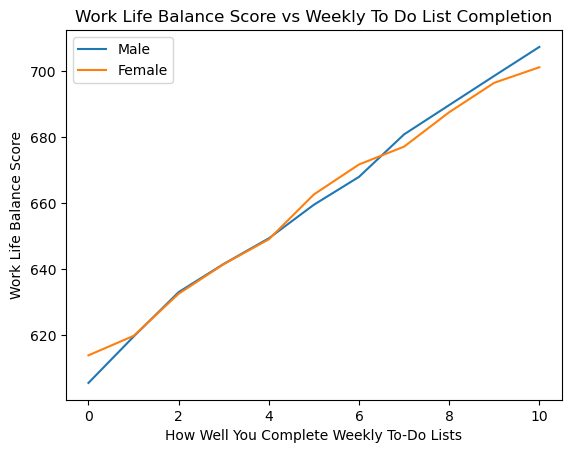

In [9]:
# Group by to-do completed and take the average work life balance score of each group
male_todo = male_expertise.groupby('To-Do Completed')['Work Life Balance Score'].mean()
female_todo = female_expertise.groupby('To-Do Completed')['Work Life Balance Score'].mean()

# Plot the data
male_todo.plot(label='Male')
female_todo.plot(label='Female')

# Create x and y labels and title
plt.xlabel('How Well You Complete Weekly To-Do Lists')
plt.ylabel('Work Life Balance Score')
plt.title('Work Life Balance Score vs Weekly To Do List Completion')
plt.legend(loc='best')
plt.show()

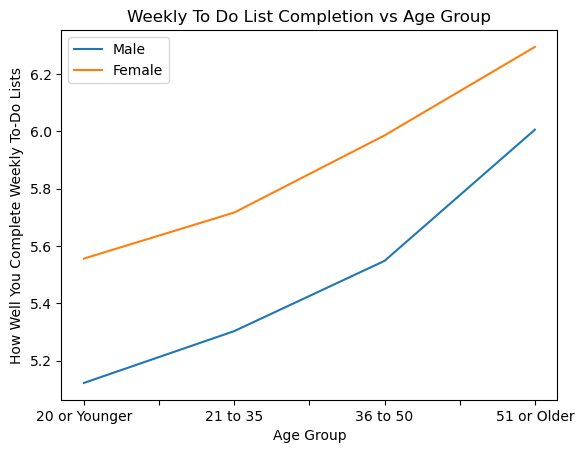

In [17]:
# Plot to do completed grouped by age
male_todo_age = male_expertise.groupby('Age')['To-Do Completed'].mean()
female_todo_age = female_expertise.groupby('Age')['To-Do Completed'].mean()

# Plot the data
male_todo_age.plot(label='Male')
female_todo_age.plot(label='Female')

# Create x and y labels and title
plt.xlabel('Age Group')
plt.ylabel('How Well You Complete Weekly To-Do Lists')
plt.title('Weekly To Do List Completion vs Age Group')
plt.legend(loc='best')
plt.show()

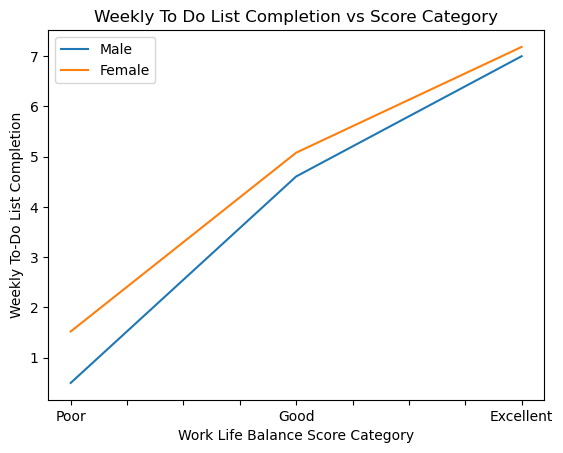

In [10]:
# Plot weekly to do list completion vs work life balance score bin
male_todo_bins = male_expertise.groupby('Work Life Summary')['To-Do Completed'].mean()
female_todo_bins = female_expertise.groupby('Work Life Summary')['To-Do Completed'].mean()

# Plot the data
male_todo_bins.plot(label='Male')
female_todo_bins.plot(label='Female')

# Create x and y labels and title
plt.xlabel('Work Life Balance Score Category')
plt.ylabel('Weekly To-Do List Completion')
plt.title('Weekly To Do List Completion vs Score Category')
plt.legend(loc='best')
plt.show()

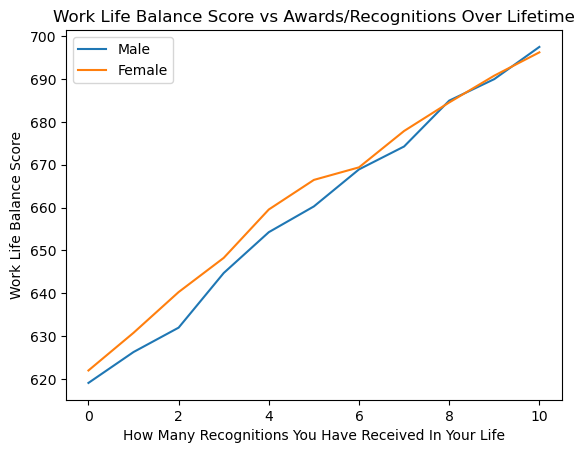

In [11]:
# Group by personal awards and take the average work life balance score of each group
male_awards= male_expertise.groupby('Personal Awards')['Work Life Balance Score'].mean()
female_awards = female_expertise.groupby('Personal Awards')['Work Life Balance Score'].mean()

# Plot the data
male_awards.plot(label='Male')
female_awards.plot(label='Female')

# Create x and y labels and title
plt.xlabel('How Many Recognitions You Have Received In Your Life')
plt.ylabel('Work Life Balance Score')
plt.title('Work Life Balance Score vs Awards/Recognitions Over Lifetime')
plt.legend(loc='best')
plt.show()

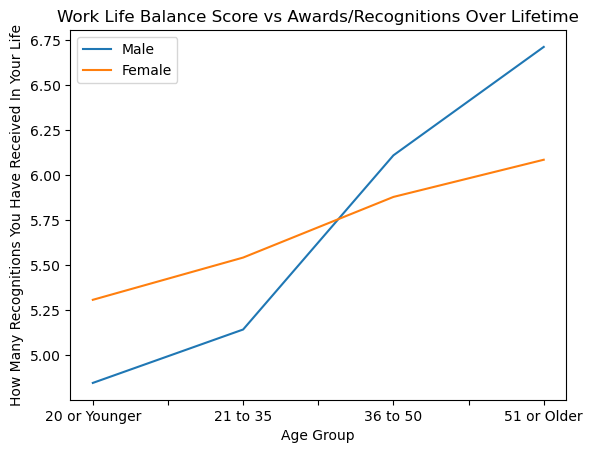

In [18]:
# Plot personal awards vs age 
male_awards_age= male_expertise.groupby('Age')['Personal Awards'].mean()
female_awards_age = female_expertise.groupby('Age')['Personal Awards'].mean()

# Plot the data
male_awards_age.plot(label='Male')
female_awards_age.plot(label='Female')

# Create x and y labels and title
plt.xlabel('Age Group')
plt.ylabel('How Many Recognitions You Have Received In Your Life')
plt.title('Work Life Balance Score vs Awards/Recognitions Over Lifetime')
plt.legend(loc='best')
plt.show()

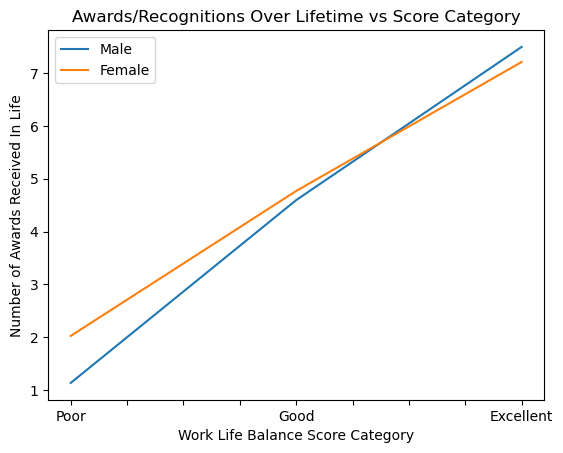

In [12]:
# Plot number of awards versus score category
male_awards_bins = male_expertise.groupby('Work Life Summary')['Personal Awards'].mean()
female_awards_bins = female_expertise.groupby('Work Life Summary')['Personal Awards'].mean()

# Plot the data
male_awards_bins.plot(label='Male')
female_awards_bins.plot(label='Female')

# Create x and y labels and title
plt.xlabel('Work Life Balance Score Category')
plt.ylabel('Number of Awards Received In Life')
plt.title('Awards/Recognitions Over Lifetime vs Score Category')
plt.legend(loc='best')
plt.show()

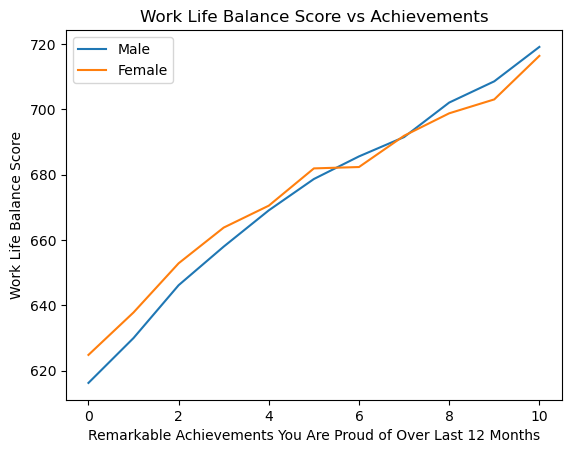

In [13]:
# Group by achievements and take the average work life balance score of each group
male_achievements = male_expertise.groupby('Achievements')['Work Life Balance Score'].mean()
female_achievements = female_expertise.groupby('Achievements')['Work Life Balance Score'].mean()

# Plot the data
male_achievements.plot(label='Male')
female_achievements.plot(label='Female')

# Create x and y labels and title
plt.xlabel('Remarkable Achievements You Are Proud of Over Last 12 Months')
plt.ylabel('Work Life Balance Score')
plt.title('Work Life Balance Score vs Achievements')
plt.legend(loc='best')
plt.show()

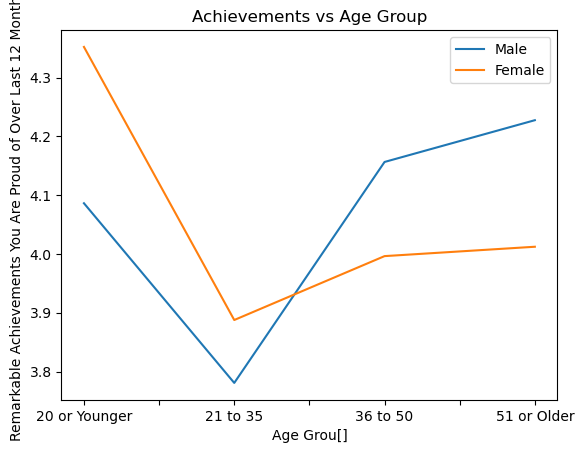

In [20]:
# Plot achievements vs age group
male_achievements_age = male_expertise.groupby('Age')['Achievements'].mean()
female_achievements_age = female_expertise.groupby('Age')['Achievements'].mean()

# Plot the data
male_achievements_age.plot(label='Male')
female_achievements_age.plot(label='Female')

# Create x and y labels and title
plt.xlabel('Age Grou[]')
plt.ylabel('Remarkable Achievements You Are Proud of Over Last 12 Months')
plt.title('Achievements vs Age Group')
plt.legend(loc='best')
plt.show()

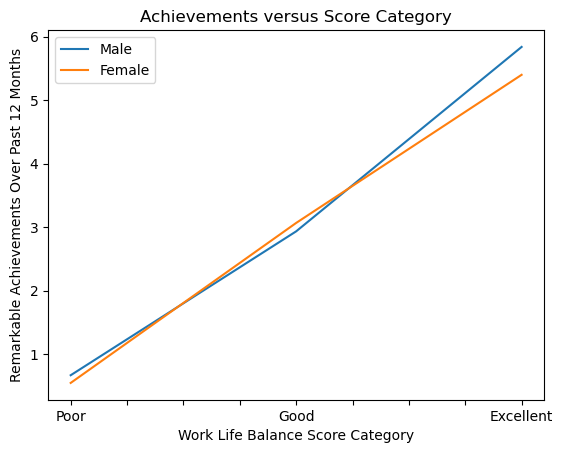

In [14]:
# Plot achievements versus work life balance score category
male_achievements_bins = male_expertise.groupby('Work Life Summary')['Achievements'].mean()
female_achievements_bins = female_expertise.groupby('Work Life Summary')['Achievements'].mean()

# Plot the data
male_achievements_bins.plot(label='Male')
female_achievements_bins.plot(label='Female')

# Create x a y labels and title
plt.xlabel('Work Life Balance Score Category')
plt.ylabel('Remarkable Achievements Over Past 12 Months')
plt.title('Achievements versus Score Category')
plt.legend(loc='best')
plt.show()


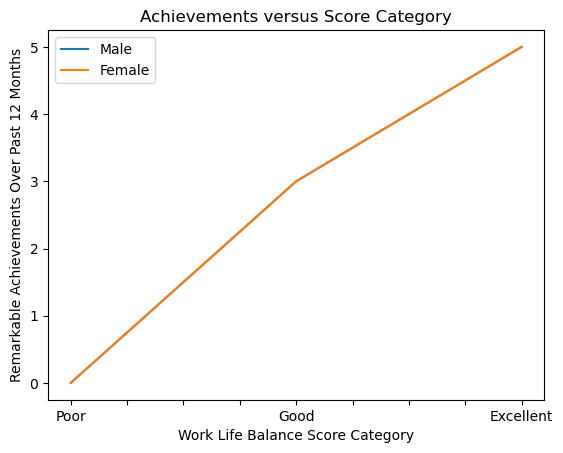

In [15]:
# Plot achievements versus work life balance score category
male_achievements_bins_med = male_expertise.groupby('Work Life Summary')['Achievements'].median()
female_achievements_bins_med = female_expertise.groupby('Work Life Summary')['Achievements'].median()

# Plot the data
male_achievements_bins_med.plot(label='Male')
female_achievements_bins_med.plot(label='Female')

# Create x a y labels and title
plt.xlabel('Work Life Balance Score Category')
plt.ylabel('Remarkable Achievements Over Past 12 Months')
plt.title('Achievements versus Score Category')
plt.legend(loc='best')
plt.show()